# Lesson 13, Workalong 02: Plotting geospatial data

This workalong shows how to use `rioxarray` to read a raster file (a GeoTIFF in this case) to add topography to our plot.  It also shows some tricks for getting good-looking topo plots.

In [1]:
""" Import libraries """
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import rioxarray
import cartopy
import numpy as np
import cmocean

mpl.style.use('seaborn-v0_8-poster')

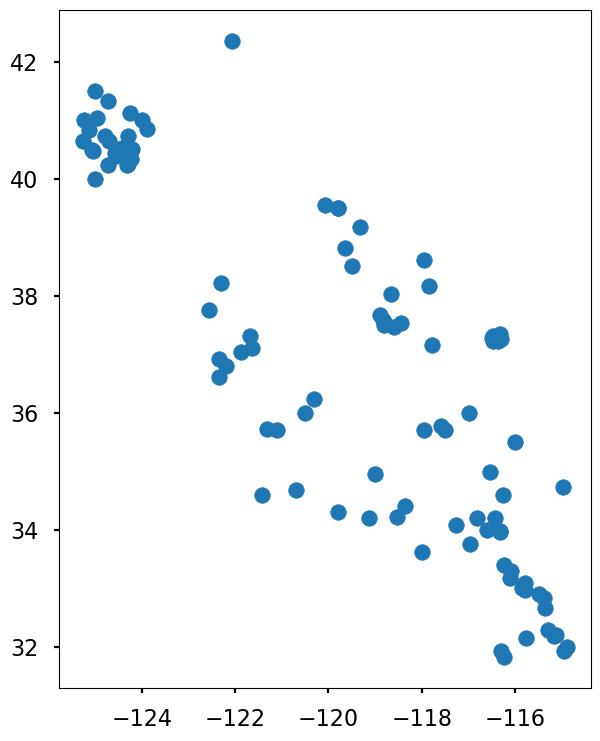

In [2]:
""" Load the earthquake data from the earlier exercise. """

# set the ca earthquake data path
data_file = "ca_earthquakes.shp.zip"

# read in the data
ca_eq = gpd.read_file(data_file)

ca_eq.plot();

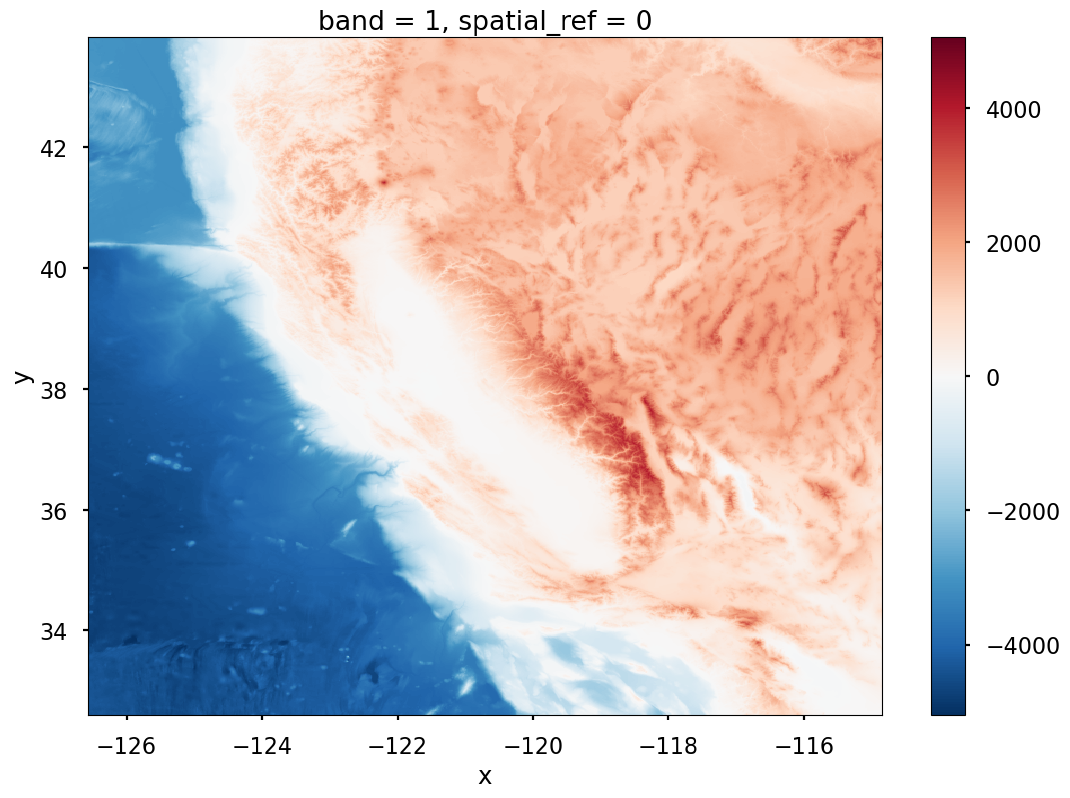

In [3]:
""" Load the topo / bathymetry data. """

# set the filepath
topo_bathy_path = "https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/09188e9e6a0cf230f8473c0ae95d2e1b9079df3a/lessons/13_geospatial_intro/data/western_us_topo_bathy_subset.tiff"

# read in the data
topo_bathy_rxr = rioxarray.open_rasterio(topo_bathy_path)

topo_bathy_rxr.plot();



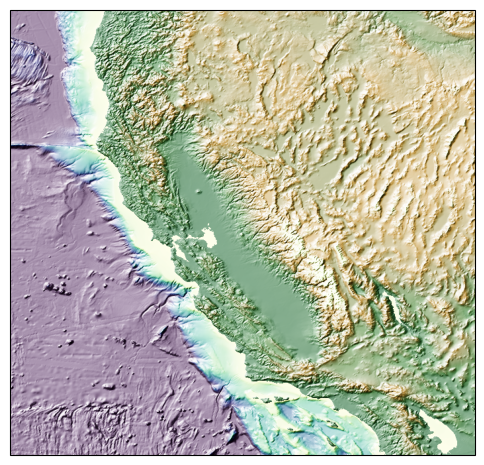

In [4]:
""" Generate a plot of earthquake locations on top of the topography / bathymetry data. """

# set the projection
projection = cartopy.crs.PlateCarree()

# create a figure and axis
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(projection=projection))

# get the projection as a PROJ4 string
proj4 = projection.proj4_init

# ******************************************
# create a hillshade of the topo/bathy data
# ******************************************
# set the light source
ls = mpl.colors.LightSource(azdeg=315, altdeg=45)

# reproject the topo bathy data
topo_bathy_rxr_proj = topo_bathy_rxr.rio.reproject(proj4)

# get the x and y gridspacing
dx = abs(topo_bathy_rxr_proj.x.diff('x').values[0])
dy = abs(topo_bathy_rxr_proj.y.diff('y').values[0])
rearth = 6.371e6 # earth radius [m]
dx_meters = np.deg2rad(dx) * rearth * np.cos(np.deg2rad(topo_bathy_rxr.y.mean().values))
dy_meters = np.deg2rad(dy) * rearth

# generate a blended hillshade
blend = ls.shade(
    topo_bathy_rxr_proj.squeeze().values,
    dx=dx_meters, dy=dy_meters,
    vert_exag=10,
    cmap=cmocean.cm.topo,
    blend_mode='hsv',
    vmin = -3000, vmax = 3000,
)

# get the extent of the data
left, bottom, right, top = topo_bathy_rxr_proj.rio.bounds()

# set the plot extent
ax.set_extent([left, right, bottom, top], crs=projection)

# plot the hillshade
ax.imshow(blend, extent=[left, right, bottom, top], transform=projection)

# *************************
# plot the earthquake data
# *************************


# ********************
# geographic features
# ********************

plt.show()